**A/B Testing for Real Ads Data**

X Company recently introduced a new type of bidding, average bidding, as an alternative to the current type of bidding called maximum bidding.We want to understand which option is more advantageous.

Which of these two options will increase amount of purchases?

Is there a significant difference between the two options?

To find the answer to these questions, we are applying the A/B Test.

In this dataset you can find the analysis result of comparison of these two product regarding observations in last 30 days.

**Impression** : Ad impressions

**Click** : Number of clicks on the displayed ad

**Purchase** : The number of products purchased after the ads clicked

**Earning**: Earnings after purchased products

In [4]:
#importing libraries
import os
os.getcwd()
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, ttest_ind
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest


In [5]:

df_control = pd.read_excel("ab_testing.xlsx", sheet_name="Control Group")
df_test = pd.read_excel("ab_testing.xlsx", sheet_name="Test Group")

In [8]:
#lets check control and test group data's.

In [6]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head())
    print("##################### Tail #####################")
    print(dataframe.tail())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)



In [7]:
# Control Group (Maximum bidding)
check_df(df_control)


##################### Shape #####################
(40, 4)
##################### Types #####################
Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object
##################### Head #####################
      Impression        Click    Purchase      Earning
0   82529.459271  6090.077317  665.211255  2311.277143
1   98050.451926  3382.861786  315.084895  1742.806855
2   82696.023549  4167.965750  458.083738  1797.827447
3  109914.400398  4910.882240  487.090773  1696.229178
4  108457.762630  5987.655811  441.034050  1543.720179
##################### Tail #####################
       Impression        Click    Purchase      Earning
35  132064.219003  3747.157544  551.072406  2256.975589
36   86409.941796  4608.256205  345.046033  1781.357690
37  123678.934234  3649.073787  476.168128  2187.721217
38  101997.494099  4736.353369  474.613537  2254.563834
39  121085.881220  4285.178608  590.406020  1289.308948
##################### NA #

In [12]:
# Test Goup (Average_bidding)
check_df(df_test)

##################### Shape #####################
(40, 4)
##################### Types #####################
Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object
##################### Head #####################
      Impression        Click    Purchase      Earning
0  120103.503796  3216.547958  702.160346  1939.611243
1  134775.943363  3635.082422  834.054286  2929.405820
2  107806.620788  3057.143560  422.934258  2526.244877
3  116445.275526  4650.473911  429.033535  2281.428574
4  145082.516838  5201.387724  749.860442  2781.697521
##################### Tail #####################
       Impression        Click    Purchase      Earning
35   79234.911929  6002.213585  382.047116  2277.863984
36  130702.239410  3626.320072  449.824592  2530.841327
37  116481.873365  4702.782468  472.453725  2597.917632
38   79033.834921  4495.428177  425.359102  2595.857880
39  102257.454089  4800.068321  521.310729  2967.518390
##################### NA #

<AxesSubplot:title={'center':'Test-Purchase Mean'}, xlabel='Purchase'>

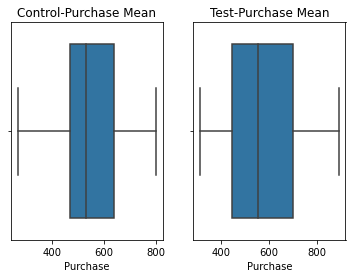

In [8]:
f, axes = plt.subplots(1, 2)
axes[0].set_title('Control-Purchase Mean')
axes[1].set_title('Test-Purchase Mean')
sns.boxplot(x='Purchase',data=df_control,ax=axes[0])
sns.boxplot(x='Purchase',data=df_test,ax=axes[1])

In [18]:
df_control["group"] = "control"

df_test["group"] = "test"

In [30]:
df = pd.concat([df_control,df_test], axis=0,ignore_index=False)
df.head()


,Impression,Click,Purchase,Earning,group
0,82529.459271,6090.077317,665.211255,2311.277143,control
1,98050.451926,3382.861786,315.084895,1742.806855,control
2,82696.023549,4167.965750,458.083738,1797.827447,control
3,109914.400398,4910.882240,487.090773,1696.229178,control
4,108457.762630,5987.655811,441.034050,1543.720179,control


In [31]:
df.tail()

,Impression,Click,Purchase,Earning,group
35,79234.911929,6002.213585,382.047116,2277.863984,test
36,130702.239410,3626.320072,449.824592,2530.841327,test
37,116481.873365,4702.782468,472.453725,2597.917632,test
38,79033.834921,4495.428177,425.359102,2595.857880,test
39,102257.454089,4800.068321,521.310729,2967.518390,test


**Define the Hypothesis of A-B Test**

H0: There is no statistically significant difference between the purchasing amounts of the two groups ( μ1=μ2 )

H1: There is statistically significant differences between the purchasing amounts of the two groups (μ1 ≠ μ2 )

In [32]:
df.groupby("group").agg({"Purchase": "mean"})

,Purchase
group,
control,550.894059
test,582.106097


**Checking Assumptions**

- Normal Distribution

- Homogeneity of Variance



**Normal Distribution**

Shapiro - Wilk Test

H0: The data is normally distributed

H1: The data is not normally-distributed

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


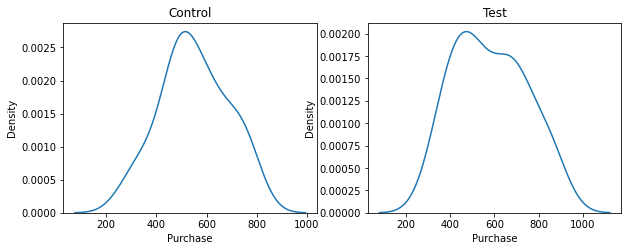

In [12]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(3.5)
fig.set_figwidth(10)
sns.distplot (df_control['Purchase'], hist=False,ax=ax[0])
sns.distplot (df_test['Purchase'], hist=False,ax=ax[1])
ax[0].set_title('Control')
ax[1].set_title('Test')
plt.show(block=True)

In [33]:
# Control Group

test_stat, pvalue = shapiro(df.loc[df["group"] == "control", "Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9773, p-value = 0.5891


For the Control Group (p-value>.05) it tells us that the distribution of the sample is not significantly different from a normal distribution.

In [35]:
#Test Group

test_stat, pvalue = shapiro(df.loc[df["group"] == "test", "Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9589, p-value = 0.1541


For the Test Group (p-value>.05) it tells us that the distribution of the sample is not significantly different from a normal distribution.

**Homogeneity of Variance**

Levene Test

H0:The variance among groups is equal

H1:The variance among different groups is not equal 

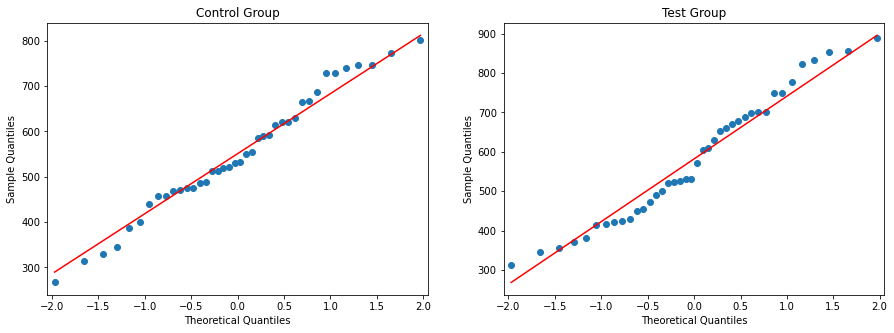

In [37]:
from statsmodels.graphics.gofplots import qqplot
fig, axs =plt.subplots(1,2,figsize=(15,5))
qqplot(np.array(df.loc[df["group"] == "control", "Purchase"]), line= 's', ax =axs[0])
qqplot(np.array(df.loc[df["group"] == "test", "Purchase"]), line= 's', ax =axs[1])

axs[0].set_title('Control Group')
axs[1].set_title('Test Group')
plt.show()

In [38]:
test_stat, pvalue = levene(df.loc[df["group"] == "control", "Purchase"],
                           df.loc[df["group"] == "test", "Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


Since, p-value>.05, hence we do not reject the null hypothesis. The variance among groups is equal.

As the normality and equal variance of distributions assumptions are satisfied, we can use Independent A-B Test for testing the hypothesis:

For A-B test, the hypothesis is as follows:

H0: There is no statistically significant difference between the purchasing amounts of the two groups
( μ1=μ2 )


H1: There is statistically significant differences between the purchasing amounts of the two groups
(μ1 ≠ μ2 )

In [39]:
test_stat, pvalue = ttest_ind(df.loc[df["group"] == "control", "Purchase"],
                              df.loc[df["group"] == "test", "Purchase"],
                              equal_var=True)

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -0.9416, p-value = 0.3493


Since, p-value>.05, hence we do not reject the null hypothesis.There is no statistically significant difference between the purchase amounts of the Average Bidding and Maximum Bidding systems.